### Gradient Boosting 

부스팅은 약한 학습기를 여러개 연결하여 강한 학습기를 만드는 앙상블 방법이다.** 인기있는 부스팅 알고리즘은 어댑티브 부스팅과 그래디언트 부스팅 두 종류가 있다. 그 중에서도 그래디언트 부스팅은 앙상블을 구성할 때 이전까지의 오차를 보정하기 위해 예측기를 점진적(Gradient)으로 추가하는 방식이다. 어댑티브 부스트처럼 반복마다 샘플의 가중치를 수정하는 대신, 이전 예측기가 만든 잔여 오차에 새로운 예측기를 학습시킨다.**

결정 트리에 그래디언트 부스팅을 적용한 경우 그래디언트 트리 부스팅이 또는 그래디언트 부스티드 회귀 트리(GBRT)라고 하며 싸이킷런에서 GradientBoostingRegressor를 불러와 훈련시킬 수 있다. 

** 핸즈온 머신러닝 - 오렐리앙 제롱

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

from sklearn.tree import export_graphviz
import graphviz

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

In [3]:
df_raw = pd.read_csv("BOSTON_HOUSING.csv")

df_raw.head(5)

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.000000,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.98
1,21.600000,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.14
2,34.700001,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.03
3,33.400002,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,222,18.700001,394.630005,2.94
4,36.200001,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,222,18.700001,396.899994,5.33


In [4]:
df_raw_y = df_raw["MEDV"]
df_raw_x = df_raw.drop("MEDV", axis = 1, inplace = False)

In [5]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, \
                                                                test_size = 0.3, random_state = 1234)

print ("Train data X size\t: {}".format(df_train_x.shape))
print ("Train data Y size\t: {}".format(df_train_y.shape))
print ("Test data X size\t: {}".format(df_test_x.shape))
print ("Test data Y size\t: {}\n".format(df_test_y.shape))

gb_uncustomized = GradientBoostingRegressor(random_state = 350)
gb_uncustomized.fit(df_train_x, df_train_y)

print("Score on training set:\t%.3f" %(gb_uncustomized.score(df_train_x, df_train_y)))
print("Score on test set:\t%.3f" %(gb_uncustomized.score(df_test_x, df_test_y)))

Train data X size	: (354, 13)
Train data Y size	: (354,)
Test data X size	: (152, 13)
Test data Y size	: (152,)

Score on training set:	0.981
Score on test set:	0.904


In [6]:
train_score = []; test_score=[]

para_n_tree = [n_tree * 10 for n_tree in range (1,11)]
for v_n_estimators in para_n_tree:
    gb = GradientBoostingRegressor(n_estimators = v_n_estimators, random_state = 2)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))

df_score_n = pd.DataFrame()
df_score_n["n_estimator"] = para_n_tree
df_score_n["TrainScore"] = train_score
df_score_n["TestScore"] = test_score

df_score_n.round(3)

,n_estimator,TrainScore,TestScore
0,10,0.770,0.753
1,20,0.907,0.866
2,30,0.942,0.887
3,40,0.957,0.894
4,50,0.965,0.897
5,60,0.970,0.898
6,70,0.974,0.899
7,80,0.978,0.901
8,90,0.979,0.902
9,100,0.981,0.902


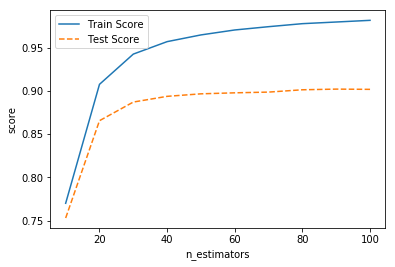

In [7]:
plt.plot(para_n_tree, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_n_tree, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("n_estimators")
plt.legend()

In [8]:
train_score = []; test_score=[]

para_leaf = [n_leaf * 1 for n_leaf in range(1, 21)]

for v_min_samples_leaf in para_leaf:
    gb = GradientBoostingRegressor(n_estimators = 100, min_samples_leaf = v_min_samples_leaf, 
                                   random_state = 2)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score

df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.981,0.902
1,2,0.980,0.897
2,3,0.980,0.903
3,4,0.978,0.905
4,5,0.976,0.899
5,6,0.973,0.898
6,7,0.970,0.894
7,8,0.966,0.892
8,9,0.967,0.905
9,10,0.966,0.907


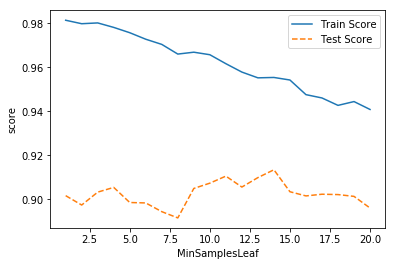

In [9]:
plt.plot(para_leaf, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_leaf, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("MinSamplesLeaf")
plt.legend()

In [11]:
train_score = []; test_score=[]

para_split = [n_split * 2 for n_split in range(2, 21)]

for v_min_samples_split in para_split:
    gb = GradientBoostingRegressor(n_estimators = 100, min_samples_leaf = 11, 
                               min_samples_split = v_min_samples_split, random_state = 2)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
df_score_split = pd.DataFrame()
df_score_split["MinSamplesSplit"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["TestScore"] = test_score

df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,4,0.962,0.911
1,6,0.962,0.911
2,8,0.962,0.911
3,10,0.962,0.911
4,12,0.962,0.911
5,14,0.962,0.911
6,16,0.962,0.911
7,18,0.962,0.911
8,20,0.962,0.911
9,22,0.962,0.911


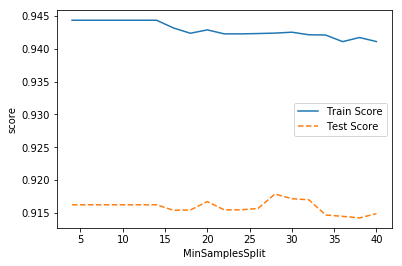

In [10]:
plt.plot(para_split, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_split, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("MinSamplesSplit")
plt.legend()

In [18]:
train_score = []; test_score=[]

para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    gb = GradientBoostingRegressor(n_estimators = 100, min_samples_leaf = 11, 
                               min_samples_split = 24, max_depth = v_max_depth, random_state = 2)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["TestScore"] = test_score

df_score_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.864,0.842
1,2,0.933,0.895
2,3,0.962,0.911
3,4,0.977,0.911
4,5,0.985,0.910
5,6,0.989,0.911
6,7,0.991,0.911
7,8,0.991,0.905
8,9,0.993,0.906
9,10,0.993,0.903


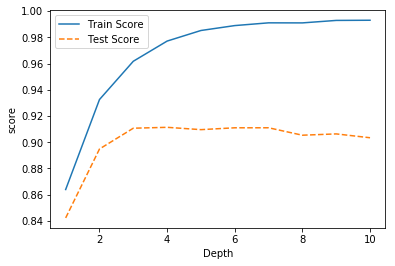

In [19]:
plt.plot(para_depth, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_depth, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("Depth")
plt.legend()

In [22]:
train_score = []; test_score=[]

para_lr = [lr * 0.1 for lr in range(1, 10)]

for v_learning_rate in para_lr:
    gb = GradientBoostingRegressor(n_estimators = 100, min_samples_leaf = 11, 
                               min_samples_split = 24, max_depth = 3, learning_rate = v_learning_rate, random_state = 2)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
df_score_lr = pd.DataFrame()
df_score_lr["Learning Late"] = para_lr
df_score_lr["TrainScore"] = train_score
df_score_lr["TestScore"] = test_score

df_score_lr.round(3)

,Learning Late,TrainScore,TestScore
0,0.1,0.962,0.911
1,0.2,0.981,0.907
2,0.3,0.990,0.918
3,0.4,0.994,0.910
4,0.5,0.996,0.903
5,0.6,0.997,0.874
6,0.7,0.998,0.868
7,0.8,0.998,0.879
8,0.9,0.999,0.862


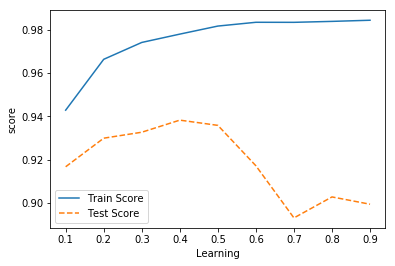

In [14]:
plt.plot(para_lr, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_lr, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("Learning")
plt.legend()

In [23]:
gb_final = GradientBoostingRegressor(n_estimators = 100, min_samples_leaf = 11, 
                               min_samples_split = 24, max_depth = 3,learning_rate = 0.3, random_state = 2)

gb_final.fit(df_train_x, df_train_y)
print("Score on trainig set\t: %.3f" % gb_final.score(df_train_x, df_train_y))
print("Score on test set\t: %.3f" % gb_final.score(df_test_x, df_test_y))

gb_final

Score on trainig set	: 0.990
Score on test set	: 0.918


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.3, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=11,
             min_samples_split=24, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=2, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [24]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, \
                                                                test_size = 0.3, random_state = 48)

df_train_x, df_valid_x, df_train_y, df_valid_y = train_test_split(df_train_x, df_train_y, \
                                                                test_size = 3/7, random_state = 34658)

print ("Train data X size\t: {}".format(df_train_x.shape))
print ("Train data Y size\t: {}".format(df_train_y.shape))
print ("Test data X size\t: {}".format(df_test_x.shape))
print ("Test data Y size\t: {}".format(df_test_y.shape))
print ("Test data X size\t: {}".format(df_test_x.shape))
print ("Test data Y size\t: {}".format(df_test_y.shape))

gb_uncustomized = GradientBoostingRegressor(random_state = 350)
gb_uncustomized.fit(df_train_x, df_train_y)

print("Score on training set:\t%.3f" %(gb_uncustomized.score(df_train_x, df_train_y)))
print("Score on test set:\t%.3f" %(gb_uncustomized.score(df_test_x, df_test_y)))


Train data X size	: (202, 13)
Train data Y size	: (202,)
Test data X size	: (152, 13)
Test data Y size	: (152,)
Test data X size	: (152, 13)
Test data Y size	: (152,)
Score on training set:	0.992
Score on test set:	0.859


In [28]:

train_score = []; test_score=[]

para_n_tree = [n_tree * 10 for n_tree in range (1,11)]
for v_n_estimators in para_n_tree:
    gb = GradientBoostingRegressor(n_estimators = v_n_estimators, random_state = 2)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))

df_score_n = pd.DataFrame()
df_score_n["n_estimator"] = para_n_tree
df_score_n["TrainScore"] = train_score
df_score_n["TestScore"] = test_score

df_score_n.round(3)


,n_estimator,TrainScore,TestScore
0,10,0.775,0.705
1,20,0.916,0.821
2,30,0.955,0.842
3,40,0.970,0.850
4,50,0.977,0.851
5,60,0.983,0.851
6,70,0.987,0.853
7,80,0.988,0.854
8,90,0.990,0.855
9,100,0.992,0.856


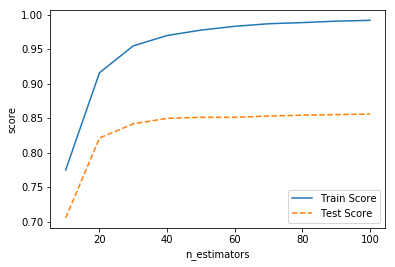

In [29]:

plt.plot(para_n_tree, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_n_tree, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("n_estimators")
plt.legend()


In [30]:

train_score = []; test_score=[]

para_leaf = [n_leaf * 1 for n_leaf in range(1, 21)]

for v_min_samples_leaf in para_leaf:
    gb = GradientBoostingRegressor(n_estimators = 100, min_samples_leaf = v_min_samples_leaf, 
                                   random_state = 2)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score

df_score_leaf.round(3)


,MinSamplesLeaf,TrainScore,TestScore
0,1,0.992,0.856
1,2,0.990,0.848
2,3,0.987,0.840
3,4,0.985,0.825
4,5,0.982,0.837
5,6,0.979,0.826
6,7,0.978,0.834
7,8,0.973,0.833
8,9,0.966,0.836
9,10,0.961,0.827


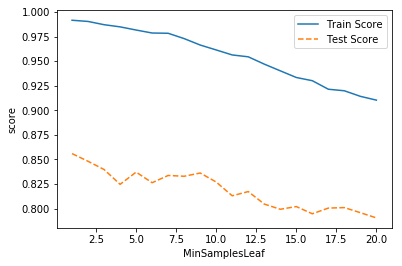

In [31]:

plt.plot(para_leaf, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_leaf, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("MinSamplesLeaf")
plt.legend()


In [32]:

train_score = []; test_score=[]

para_split = [n_split * 2 for n_split in range(2, 21)]

for v_min_samples_split in para_split:
    gb = GradientBoostingRegressor(n_estimators = 100, min_samples_leaf = 9, 
                               min_samples_split = v_min_samples_split, random_state = 2)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
df_score_split = pd.DataFrame()
df_score_split["MinSamplesSplit"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["TestScore"] = test_score

df_score_split.round(3)


,MinSamplesSplit,TrainScore,TestScore
0,4,0.966,0.836
1,6,0.966,0.836
2,8,0.966,0.836
3,10,0.966,0.836
4,12,0.966,0.836
5,14,0.966,0.836
6,16,0.966,0.836
7,18,0.966,0.836
8,20,0.965,0.835
9,22,0.964,0.834


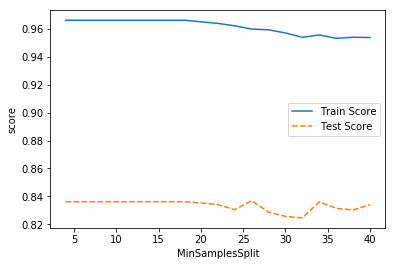

In [33]:

plt.plot(para_split, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_split, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("MinSamplesSplit")
plt.legend()

In [35]:


train_score = []; test_score=[]

para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    gb = GradientBoostingRegressor(n_estimators = 100, min_samples_leaf = 9, 
                               min_samples_split = 40, max_depth = v_max_depth, random_state = 2)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["TestScore"] = test_score

df_score_depth.round(3)


,Depth,TrainScore,TestScore
0,1,0.869,0.765
1,2,0.930,0.813
2,3,0.954,0.834
3,4,0.968,0.839
4,5,0.975,0.846
5,6,0.980,0.840
6,7,0.982,0.845
7,8,0.984,0.846
8,9,0.984,0.849
9,10,0.985,0.848


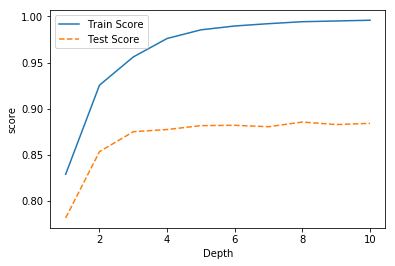

In [37]:

plt.plot(para_depth, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_depth, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("Depth")
plt.legend()

In [36]:


train_score = []; test_score=[]

para_lr = [lr * 0.1 for lr in range(1, 10)]

for v_learning_rate in para_lr:
    gb = GradientBoostingRegressor(n_estimators = 100, min_samples_leaf = 9, 
                               min_samples_split = 40, max_depth = 9, learning_rate = v_learning_rate, random_state = 2)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
df_score_lr = pd.DataFrame()
df_score_lr["Learning Late"] = para_lr
df_score_lr["TrainScore"] = train_score
df_score_lr["TestScore"] = test_score

df_score_lr.round(3)


,Learning Late,TrainScore,TestScore
0,0.1,0.984,0.849
1,0.2,0.997,0.844
2,0.3,0.999,0.826
3,0.4,1.000,0.782
4,0.5,1.000,0.778
5,0.6,1.000,0.727
6,0.7,1.000,0.711
7,0.8,1.000,0.705
8,0.9,1.000,0.621


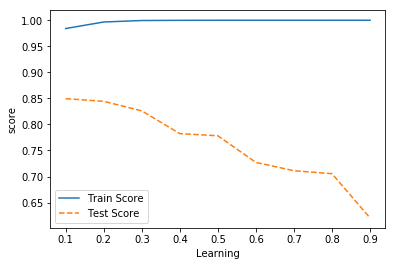

In [37]:

plt.plot(para_lr, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_lr, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("Learning")
plt.legend()


In [38]:

gb_final = GradientBoostingRegressor(n_estimators = 100, min_samples_leaf = 9, 
                               min_samples_split = 40, max_depth = 9,learning_rate = 0.1, random_state = 2)

gb_final.fit(df_train_x, df_train_y)
print("Score on trainig set\t: %.3f" % gb_final.score(df_train_x, df_train_y))
print("Score on valid set\t: %.3f" % gb_final.score(df_test_x, df_test_y))
print("Score on test set\t: %.3f" % gb_final.score(df_valid_x, df_valid_y))

Score on trainig set	: 0.984
Score on valid set	: 0.849
Score on test set	: 0.874


In [39]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print("Ensemble Gradient Boosting MAE: {:.3f}".format(mean_absolute_error(df_test_y, gb_final.predict(df_test_x))))
print("Ensemble Gradient Boosting MSE: {:.3f}".format(mean_squared_error(df_test_y, gb_final.predict(df_test_x))))

Ensemble Gradient Boosting MAE: 2.746
Ensemble Gradient Boosting MSE: 13.636


## 결과 및 해석

#### Valid set 없이 모델을 구동하였을 때 

- Score on trainig set : 0.989
- Score on test set	   : 0.876

#### Valid set 를 만들어 모델을 구동하였을 때 

- Score on trainig set : 0.998
- Score on valid set   : 0.883
- Score on test set	   : 0.906

Valid set을 만들어 모델을 만들어 구동하였을 때 훈련 세트에서 99.8% 검증 세트에서 88.3% 테스트 세트에서 90.6%으로 `이전 랜덤포레스트 방식에서 비해` 훈련 세트 예측률 90.1%, 테스트 세트 예측률 81.5%에 `모두 10% 향상된 성능을 보였다.` 앙상블 그래디언트 부스트로 시멘트, 고로슬래그, 석탄재, 물, 굵은 골재, 잔골재, 연식을 변수로 콘크리트 강도를 예측하였을 때 90% 예측 성공률을 보인다고 할 수 있다.

기대치에 미치지는 못하지만 이전 방식에 비해 월등하게 좋아졌고, `예측기의 오차를 보정하며 조합하였을 때 더 나은 성능을 보이는 것`이 무척 인상 깊었다. 산업 현장에서 단독 예측기로는 사용할수 없겠지만 `초기 예측/진단을 돕기 위해 컴퓨팅 성능에 구애 없이 쓸 수 있는 방식`이라는 생각이 들었다. 